# Breast cancer detector with tumor type

We will use Logical regression model. 2 is mean that the tumor is benign, 4 is malignant.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
# Graphing and Visualization
import matplotlib.pyplot as plt
import seaborn as sb

## Importing the dataset

In [2]:
dataset = pd.read_csv("breast-cancer-wisconsin.csv")

In [3]:
dataset.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,?,?,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Data inspection

In [4]:
dataset.info()
dataset.isin(list("?")).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    object
 3   Uniformity of Cell Shape     699 non-null    object
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 60.2+ KB


Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         1
Uniformity of Cell Shape        1
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

## Descriptive statistics
There is quite a bit of variation between means and standard deviations implying we should consider standardisng variables in pre-modelling

In [5]:
dataset.describe()

,Sample code number,Clump Thickness,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Graphing and visualization of dataset

<AxesSubplot:xlabel='Class', ylabel='count'>

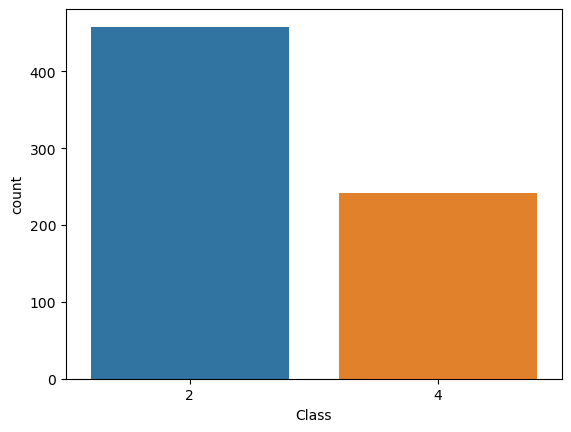

In [6]:
dataset["Class"].value_counts()
sb.countplot(x = "Class", data = dataset)

## Setting the dependent and independent variables

In [7]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [8]:
print(x)

[[5 '?' '?' ... 3 1 1]
 [5 '4' '4' ... 3 2 1]
 [3 '1' '1' ... 3 1 1]
 ...
 [5 '10' '10' ... 8 10 2]
 [4 '8' '6' ... 10 6 1]
 [4 '8' '8' ... 10 4 1]]


**We have string values, that should be numeric. This values are string because of the '?' character.** To deal with this we will turn all the "?" characters into NaN with to_numeric(). We use for loop because to_numeric function takes an 1D array. 

In [9]:
for i in range(len(x[1])):
    x[:, i] = pd.to_numeric(x[:,i], errors='coerce')

## Taking care of missing data

We have missing data, which represented by "?". We have to replace them with meaningful data to process. To do this we will use most_frequent strategy of the SimpleImputer class.

**Note: Another approach is we would use the strategy most_frequent instead of average and with that we wouldn't have to convert the whole set to integer so we wouldn't use the last for loop. It doesn't change the accuracy of the model with this set.**

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(x[:,:])
x[:,:] = imputer.transform(x[:,:])

In [11]:
print(x)

[[5.0 3.1375358166189113 3.2106017191977076 ... 3.0 1.0 1.0]
 [5.0 4.0 4.0 ... 3.0 2.0 1.0]
 [3.0 1.0 1.0 ... 3.0 1.0 1.0]
 ...
 [5.0 10.0 10.0 ... 8.0 10.0 2.0]
 [4.0 8.0 6.0 ... 10.0 6.0 1.0]
 [4.0 8.0 8.0 ... 10.0 4.0 1.0]]


## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## Training the Logical Regression model on the Training set

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [14]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis = 1))

[[2 2]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 4]
 [4 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]]


## Making the Confusion Matrix and Accuracy Score

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [16]:
print(cm)
print(accuracy_score(y_test, y_pred))

[[82  3]
 [ 1 54]]
0.9714285714285714


## Computing the accuracy with k-Fold Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.60 %
Standard Deviation: 2.58 %
